In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv('QualityPrediction.csv')
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.00000

In [4]:
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


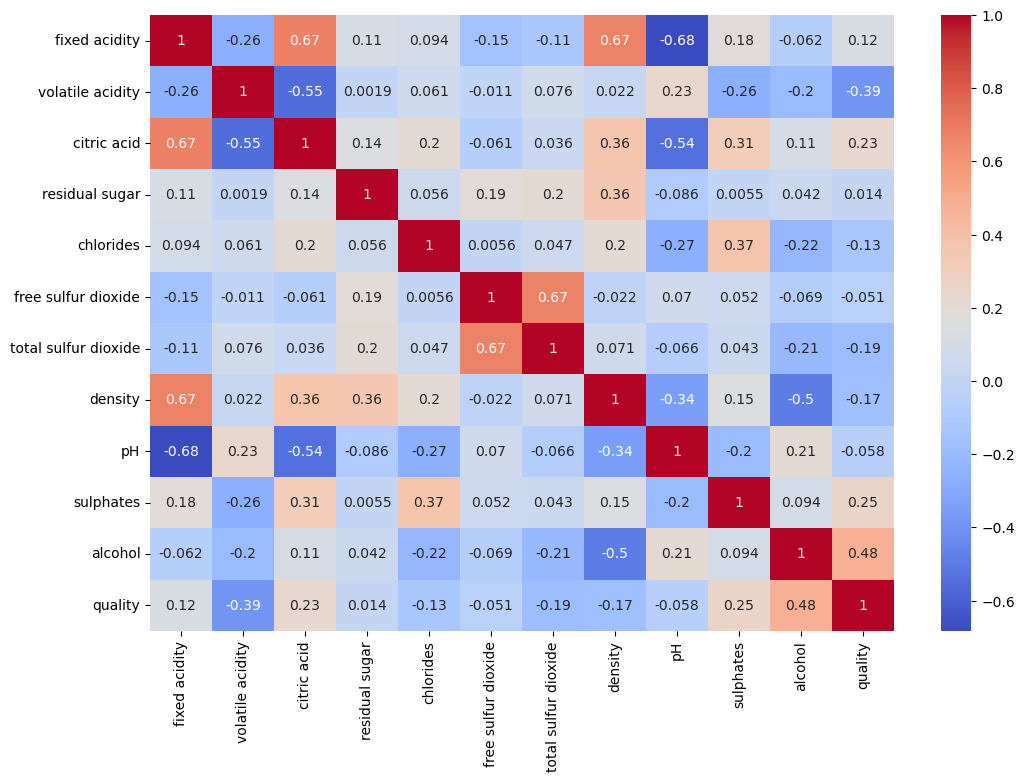

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [6]:
data = data.fillna(data.mean())

In [7]:
X = data.drop('quality', axis=1)
y = data['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.65
Classification Report:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       0.00      0.00      1.00        10
           5       0.71      0.74      0.72       130
           6       0.62      0.68      0.65       132
           7       0.63      0.52      0.57        42
           8       0.00      0.00      1.00         5

    accuracy                           0.65       320
   macro avg       0.49      0.32      0.66       320
weighted avg       0.63      0.65      0.68       320



In [12]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

optimized_rf = RandomForestClassifier(**best_params)
optimized_rf.fit(X_train, y_train)

y_pred_optimized = optimized_rf.predict(X_test)

accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f'Optimized Accuracy: {accuracy_optimized:.2f}')
print('Optimized Classification Report:')
print(classification_report(y_test, y_pred_optimized, zero_division=1))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 200}
Optimized Accuracy: 0.68
Optimized Classification Report:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00        10
           5       0.73      0.78      0.76       130
           6       0.64      0.73      0.68       132
           7       0.61      0.45      0.52        42
           8       0.00      0.00      1.00         5

    accuracy                           0.68       320
   macro avg       0.67      0.33      0.49       320
weighted avg       0.68      0.68      0.67       320



Using Logistic Regression and Support Vector Machine (SVM)

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


In [6]:
data = pd.read_csv('QualityPrediction.csv')
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [7]:
data = data.fillna(data.mean())

X = data.drop('quality', axis=1)
y = data['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)

log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'Logistic Regression Accuracy: {accuracy_log_reg:.2f}')
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred_log_reg, zero_division=1))

Logistic Regression Accuracy: 0.57
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.10      0.18        10
           5       0.63      0.75      0.69       130
           6       0.54      0.58      0.56       132
           7       0.39      0.21      0.28        42
           8       1.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.76      0.27      0.28       320
weighted avg       0.58      0.57      0.55       320



In [10]:
svm_model = SVC(kernel='linear', random_state=42)

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.2f}')
print('SVM Classification Report:')
print(classification_report(y_test, y_pred_svm, zero_division=1))

SVM Accuracy: 0.56
SVM Classification Report:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00        10
           5       0.60      0.77      0.68       130
           6       0.51      0.60      0.55       132
           7       1.00      0.00      0.00        42
           8       1.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.85      0.23      0.20       320
weighted avg       0.64      0.56      0.50       320



In [11]:
param_grid_log_reg = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid_search_log_reg = GridSearchCV(estimator=log_reg, param_grid=param_grid_log_reg, cv=5, n_jobs=-1, verbose=2)
grid_search_log_reg.fit(X_train, y_train)

best_params_log_reg = grid_search_log_reg.best_params_
print(f'Best parameters for Logistic Regression: {best_params_log_reg}')

optimized_log_reg = LogisticRegression(**best_params_log_reg, max_iter=1000)
optimized_log_reg.fit(X_train, y_train)

y_pred_log_reg_optimized = optimized_log_reg.predict(X_test)

accuracy_log_reg_optimized = accuracy_score(y_test, y_pred_log_reg_optimized)
print(f'Optimized Logistic Regression Accuracy: {accuracy_log_reg_optimized:.2f}')
print('Optimized Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred_log_reg_optimized, zero_division=1))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'saga'}
Optimized Logistic Regression Accuracy: 0.57
Optimized Logistic Regression Classification Report:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00        10
           5       0.62      0.75      0.68       130
           6       0.53      0.58      0.56       132
           7       0.33      0.14      0.20        42
           8       1.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.75      0.25      0.24       320
weighted avg       0.57      0.57      0.53       320



In [12]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}

grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2)
grid_search_svm.fit(X_train, y_train)

best_params_svm = grid_search_svm.best_params_
print(f'Best parameters for SVM: {best_params_svm}')

optimized_svm = SVC(**best_params_svm, random_state=42)
optimized_svm.fit(X_train, y_train)

y_pred_svm_optimized = optimized_svm.predict(X_test)

accuracy_svm_optimized = accuracy_score(y_test, y_pred_svm_optimized)
print(f'Optimized SVM Accuracy: {accuracy_svm_optimized:.2f}')
print('Optimized SVM Classification Report:')
print(classification_report(y_test, y_pred_svm_optimized, zero_division=1))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}
Optimized SVM Accuracy: 0.60
Optimized SVM Classification Report:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       0.00      0.00      1.00        10
           5       0.66      0.74      0.70       130
           6       0.58      0.61      0.59       132
           7       0.55      0.40      0.47        42
           8       0.00      0.00      1.00         5

    accuracy                           0.60       320
   macro avg       0.47      0.29      0.63       320
weighted avg       0.58      0.60      0.64       320

